In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [267]:
hr_attrition_dataset = pd.read_csv('./HR-Employee-Attrition.csv')

In [268]:
hr_attrition_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [269]:
hr_attrition_dataset.shape

(1470, 35)

In [270]:
hr_attrition_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [271]:
hr_attrition_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [272]:
## Dropping EmployeeNumber as it is unique key(primary key)
drop_columns = ['EmployeeNumber']

### Missing Values

In [273]:
hr_attrition_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Numerical Variables

In [274]:
# list of numerical variables
numerical_features = [feature for feature in hr_attrition_dataset.columns if hr_attrition_dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
hr_attrition_dataset[numerical_features].head()

Number of numerical variables:  26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [275]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(hr_attrition_dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [276]:
print(discrete_feature)

['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [277]:
hr_attrition_dataset[discrete_feature].head()

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


In [278]:
for feature in discrete_feature:
    print('The feature is {} and number of values are {}'.format(feature,len(hr_attrition_dataset[feature].unique())))

The feature is Education and number of values are 5
The feature is EmployeeCount and number of values are 1
The feature is EnvironmentSatisfaction and number of values are 4
The feature is JobInvolvement and number of values are 4
The feature is JobLevel and number of values are 5
The feature is JobSatisfaction and number of values are 4
The feature is NumCompaniesWorked and number of values are 10
The feature is PercentSalaryHike and number of values are 15
The feature is PerformanceRating and number of values are 2
The feature is RelationshipSatisfaction and number of values are 4
The feature is StandardHours and number of values are 1
The feature is StockOptionLevel and number of values are 4
The feature is TrainingTimesLastYear and number of values are 7
The feature is WorkLifeBalance and number of values are 4
The feature is YearsInCurrentRole and number of values are 19
The feature is YearsSinceLastPromotion and number of values are 16
The feature is YearsWithCurrManager and numb

In [279]:
for feature in discrete_feature:
    print('The feature is {} and values are {}'.format(feature, hr_attrition_dataset[feature].unique()))

The feature is Education and values are [2 1 4 3 5]
The feature is EmployeeCount and values are [1]
The feature is EnvironmentSatisfaction and values are [2 3 4 1]
The feature is JobInvolvement and values are [3 2 4 1]
The feature is JobLevel and values are [2 1 3 4 5]
The feature is JobSatisfaction and values are [4 2 3 1]
The feature is NumCompaniesWorked and values are [8 1 6 9 0 4 5 2 7 3]
The feature is PercentSalaryHike and values are [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
The feature is PerformanceRating and values are [3 4]
The feature is RelationshipSatisfaction and values are [1 4 2 3]
The feature is StandardHours and values are [80]
The feature is StockOptionLevel and values are [0 1 3 2]
The feature is TrainingTimesLastYear and values are [0 3 2 5 1 4 6]
The feature is WorkLifeBalance and values are [1 3 2 4]
The feature is YearsInCurrentRole and values are [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
The feature is YearsSinceLastPromotion and values a

In [280]:
# Dropping EmployeeCount and StandardHours as this columns have only 1 value throughtout dataset
drop_columns.append('EmployeeCount')
drop_columns.append('StandardHours')

### Continuous Variable

In [281]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


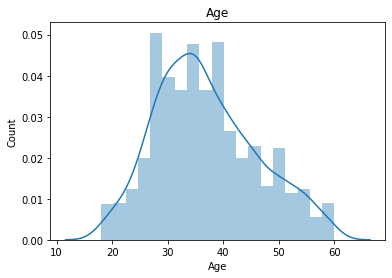

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


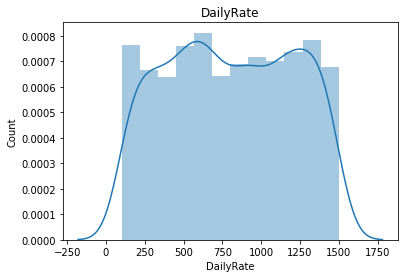

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


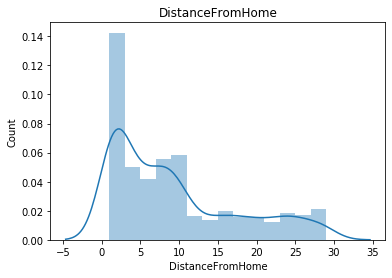

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


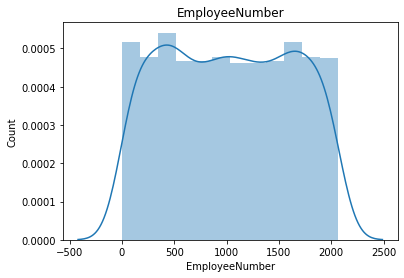

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


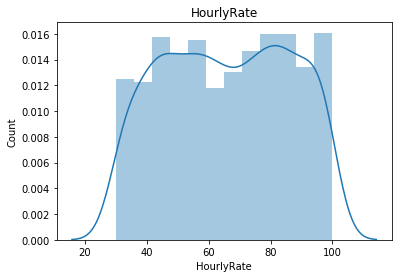

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


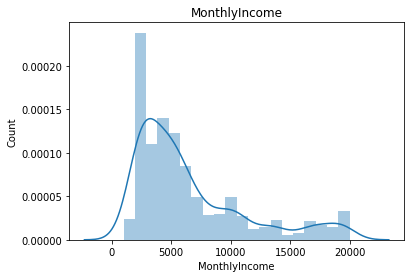

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


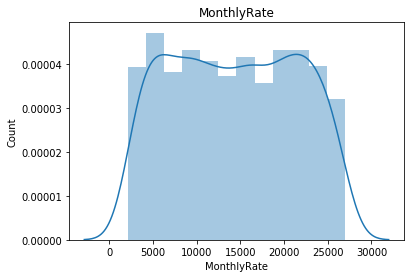

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


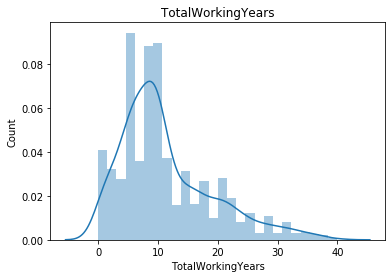

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


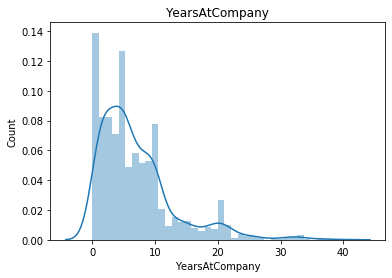

In [282]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    sns.distplot(hr_attrition_dataset[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


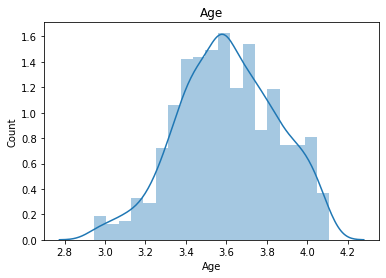

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


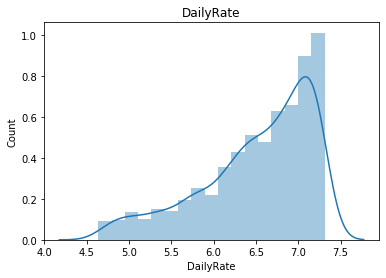

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


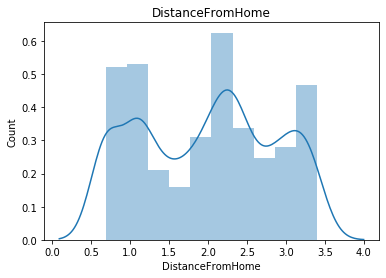

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


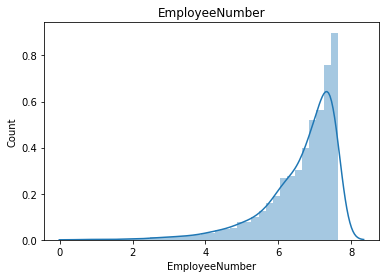

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


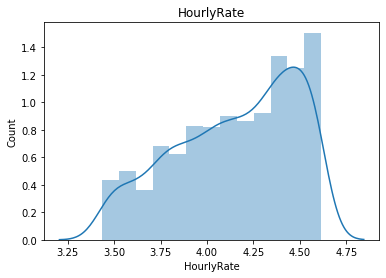

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


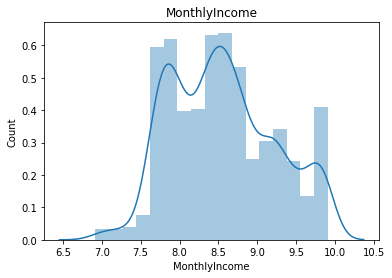

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


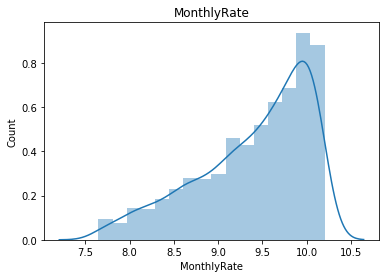

In [283]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=hr_attrition_dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])
#         data['Attrition']=np.log(data['Attrition'])
#         plt.scatter(data[feature],data[feature])
        sns.distplot(data[feature])
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

### Outliers

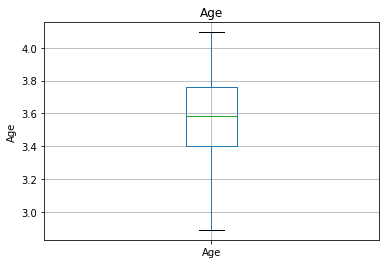

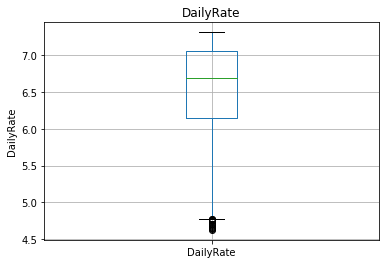

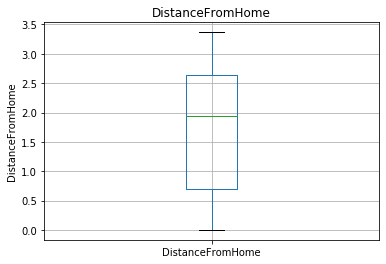

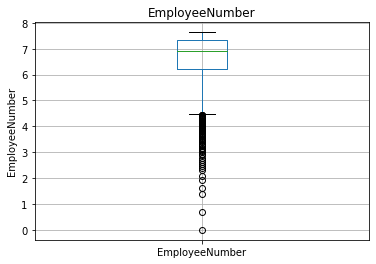

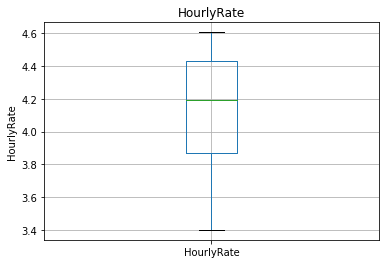

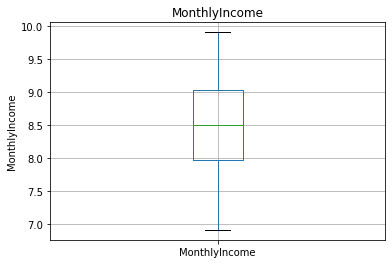

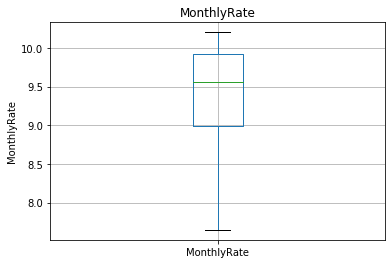

In [284]:
for feature in continuous_feature:
    data=hr_attrition_dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [285]:
# Column DailyRate has some outliers
Q1 = hr_attrition_dataset.quantile(0.25)
Q3 = hr_attrition_dataset.quantile(0.75)
IQR = Q3 - Q1
print(Q1['DailyRate'])
print(Q3['DailyRate'])
print(IQR['DailyRate'])

465.0
1157.0
692.0


In [286]:
lower_limit = Q1['DailyRate'] - (1.5 * IQR['DailyRate'])
upper_limit = Q3['DailyRate'] + (1.5 * IQR['DailyRate'])
print('Lower Limit :: ',lower_limit)
print('Upper Limit :: ',upper_limit)

Lower Limit ::  -573.0
Upper Limit ::  2195.0


In [287]:
Q1['DailyRate']

465.0

In [288]:
len(hr_attrition_dataset[((hr_attrition_dataset['DailyRate'] < lower_limit) | (hr_attrition_dataset['DailyRate'] > upper_limit))])

0

In [289]:
hr_attrition_dataset.DailyRate.min()

102

### Categorical Variables

In [290]:
categorical_features=[feature for feature in hr_attrition_dataset.columns if hr_attrition_dataset[feature].dtypes=='O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [291]:
hr_attrition_dataset[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [292]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(hr_attrition_dataset[feature].unique())))

The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


In [293]:
for feature in categorical_features:
    print('The feature is {} and categories are {}'.format(feature, hr_attrition_dataset[feature].unique()))

The feature is Attrition and categories are ['Yes' 'No']
The feature is BusinessTravel and categories are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
The feature is Department and categories are ['Sales' 'Research & Development' 'Human Resources']
The feature is EducationField and categories are ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
The feature is Gender and categories are ['Female' 'Male']
The feature is JobRole and categories are ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
The feature is MaritalStatus and categories are ['Single' 'Married' 'Divorced']
The feature is Over18 and categories are ['Y']
The feature is OverTime and categories are ['Yes' 'No']


In [294]:
# Dropping Over18 as this column have only 1 value throughtout dataset
drop_columns.append('Over18')

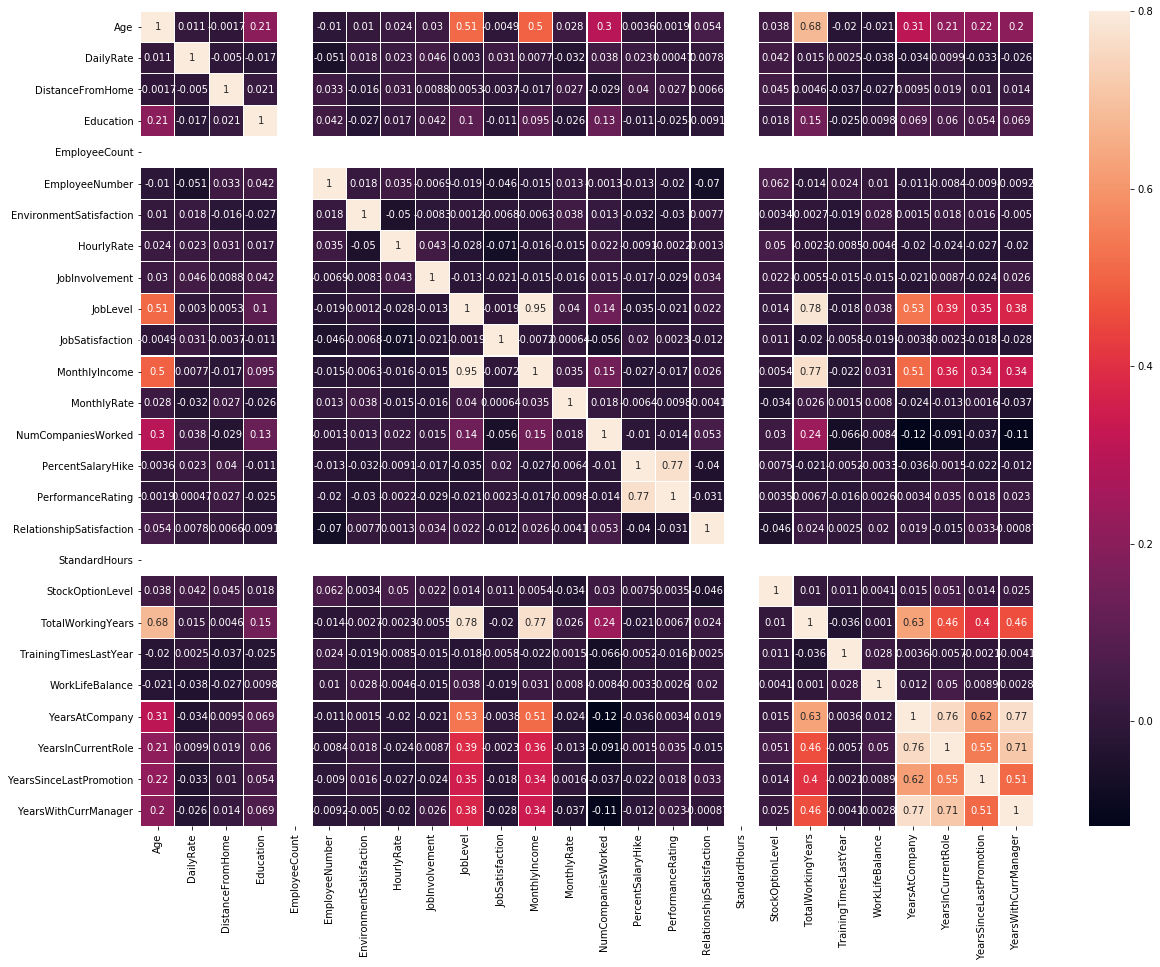

In [295]:
#plotting heat map of the corelation matrix 
plt.figure(figsize=(20, 15))
sns.heatmap(hr_attrition_dataset.corr(), annot=True, vmax=0.8, linewidth=0.1)
plt.show()

In [296]:
#Checking the Attrition Row 
attr = pd.DataFrame(hr_attrition_dataset.Attrition.value_counts())
attr['Percentage'] = attr.Attrition / hr_attrition_dataset.shape[0]
print(attr)

     Attrition  Percentage
No        1233    0.838776
Yes        237    0.161224


It can be seen that it is an unbalanced class

## Feature Engineering

### Dropping Columns with 0 standard deviation/ constant value

In [297]:
hr_attrition_dataset.drop(drop_columns, axis=1, inplace=True)

### Numerical Variables

In [298]:
# list of numerical variables
numerical_features = [feature for feature in hr_attrition_dataset.columns if hr_attrition_dataset[feature].dtypes != 'O']

In [299]:
discrete_feature=[feature for feature in numerical_features if len(hr_attrition_dataset[feature].unique())<25]

In [300]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

In [301]:
for feature in continuous_feature:
    print('The feature is {} and min value is {}'.format(feature, hr_attrition_dataset[feature].min()))

The feature is Age and min value is 18
The feature is DailyRate and min value is 102
The feature is DistanceFromHome and min value is 1
The feature is HourlyRate and min value is 30
The feature is MonthlyIncome and min value is 1009
The feature is MonthlyRate and min value is 2094
The feature is TotalWorkingYears and min value is 0
The feature is YearsAtCompany and min value is 0


In [302]:
for feature in continuous_feature:
    if 0 in hr_attrition_dataset[feature].unique():
        pass
    else:
        hr_attrition_dataset[feature]=np.log(hr_attrition_dataset[feature])

### Handling Rare Categorical Feature

In [303]:
categorical_features=[feature for feature in hr_attrition_dataset.columns if hr_attrition_dataset[feature].dtypes=='O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [304]:
OneHotEncoder(drop = 'first').fit_transform(hr_attrition_dataset[categorical_features]).toarray()

array([[1., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [305]:
hr_attrition_dataset = pd.concat([hr_attrition_dataset, pd.get_dummies(hr_attrition_dataset[categorical_features], drop_first=True)], axis=1)

In [306]:
hr_attrition_dataset.drop(categorical_features, axis=1, inplace=True)
hr_attrition_dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,3.713572,7.004882,0.000000,2,2,4.543295,3,2,4,8.698347,...,0,0,0,0,0,1,0,0,1,1
1,3.891820,5.631212,2.079442,1,3,4.110874,2,2,2,8.542861,...,0,0,0,0,1,0,0,1,0,0
2,3.610918,7.224753,0.693147,2,4,4.521789,2,1,3,7.644919,...,1,0,0,0,0,0,0,0,1,1
3,3.496508,7.238497,1.098612,4,4,4.025352,3,1,3,7.975565,...,0,0,0,0,1,0,0,1,0,1
4,3.295837,6.381816,0.693147,1,1,3.688879,3,1,2,8.151333,...,1,0,0,0,0,0,0,1,0,0


In [307]:
hr_attrition_dataset.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)

## Feature Scaling

In [174]:
data = hr_attrition_dataset.copy()
feature_scale=[feature for feature in data.columns if feature not in ['Attrition']]
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [175]:
X_scaled = scaler.transform(data[feature_scale])

In [176]:
# transform the train and test set, and add Attrition variable
data = pd.concat([data[['Attrition']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [177]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0.683737,0.885521,0.000000,0.25,0.333333,0.948607,0.666667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0,0.831787,0.374403,0.617540,0.00,0.666667,0.589446,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0.598474,0.967331,0.205847,0.25,1.000000,0.930745,0.333333,0.00,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,0.503446,0.972445,0.326260,0.75,1.000000,0.518412,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.336773,0.653689,0.205847,0.00,0.000000,0.238944,0.666667,0.00,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [178]:
X_scaled = data.drop('Attrition', axis=1).values
y_scaled = data.Attrition

In [179]:
data.to_csv('processed_data.csv',index=False)

### Checking VIF

In [180]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = data.drop('Attrition', axis=1).columns

#let's check the values
vif.sort_values(by=['vif'], ascending=False)

,vif,Features
25,83.730087,Department_Research & Development
9,55.631595,MonthlyIncome
26,50.220937,Department_Sales
27,38.904109,EducationField_Life Sciences
29,30.110705,EducationField_Medical
7,18.502537,JobLevel
39,17.644148,JobRole_Sales Executive
0,17.400386,Age
16,14.801581,TotalWorkingYears
28,11.682671,EducationField_Marketing


In [181]:
vif.loc[vif['vif']>10].sort_values(by=['vif'], ascending=False)

,vif,Features
25,83.730087,Department_Research & Development
9,55.631595,MonthlyIncome
26,50.220937,Department_Sales
27,38.904109,EducationField_Life Sciences
29,30.110705,EducationField_Medical
7,18.502537,JobLevel
39,17.644148,JobRole_Sales Executive
0,17.400386,Age
16,14.801581,TotalWorkingYears
28,11.682671,EducationField_Marketing


In [182]:
col = ['Attrition', 'Department_Research & Development', 'MonthlyIncome', 'Department_Sales', 'EducationField_Life Sciences', 
      'Age', 'JobLevel', 'YearsAtCompany']
X_scaled = data.drop(col, axis=1).values
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = data.drop(col, axis=1).columns

#let's check the values
vif.sort_values(by=['vif'], ascending=False)

,vif,Features
0,8.534633,DailyRate
7,7.986204,MonthlyRate
20,7.452710,BusinessTravel_Travel_Rarely
13,7.332908,TotalWorkingYears
15,6.962670,WorkLifeBalance
5,6.724021,JobInvolvement
9,5.819418,PercentSalaryHike
4,5.650179,HourlyRate
16,5.638647,YearsInCurrentRole
14,5.579114,TrainingTimesLastYear


## Models

In [183]:
summary = pd.DataFrame(columns=['Algorithm', 'Score', 'Recall', 'Precision', 'F1_Score', 'AUC'])

In [184]:
def get_confusion_matrix(actual, pred):
    score = accuracy_score(actual, pred)
    conf_mat = confusion_matrix(actual, pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(actual, pred)
    fpr, tpr, thresholds = roc_curve(actual, pred)
    print('Accuracy:: ', Accuracy)
    print('Precision:: ', Precision)
    print('Recall:: ', Recall)
    print('F1 Score:: ', F1_Score)
    print('AUC:: ', auc)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    return score, Recall, Precision, F1_Score, auc

### Logistic Regression

In [185]:
x = data.drop(col, axis=1)
y = data.Attrition

In [186]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=123)

In [187]:
log_reg = LogisticRegression(max_iter=400)
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
accuracy_score(train_y, log_reg.predict(train_x))

0.8785228377065112

In [189]:
y_pred_log = log_reg.predict(test_x)

Accuracy::  0.9183673469387755
Precision::  0.9817708333333334
Recall::  0.9285714285714286
F1 Score::  0.9544303797468355
AUC::  0.736499451754386


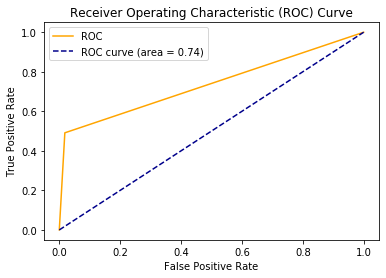

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.95443,0.736499


In [190]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_log)
summary.loc[0] = ['Logistic Regression', score, Recall, Precision, F1_Score, AUC]
summary

### KNN

In [191]:
x = data.drop('Attrition', axis=1)
y = data.Attrition
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=123)

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
knn.score(test_x, test_y)

0.8843537414965986

In [193]:
y_pred_knn = knn.predict(test_x)

Accuracy::  0.8843537414965986
Precision::  0.9817708333333334
Recall::  0.8954869358669834
F1 Score::  0.9366459627329192
AUC::  0.6049205043859649


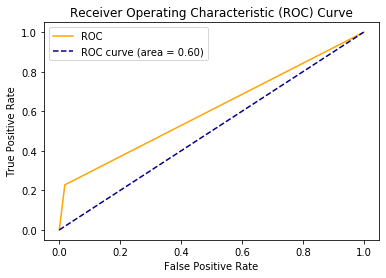

In [194]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_knn)
summary.loc[1] = ['KNN', score, Recall, Precision, F1_Score, AUC]

In [195]:
summary

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921


In [196]:
param_grid_knn = {'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [18, 20, 25, 27, 30, 32, 34],
              'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13]
             }

In [197]:
gridsearch_knn = GridSearchCV(knn, param_grid_knn)

In [198]:
gridsearch_knn.fit(train_x, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
gridsearch_knn.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 7}

In [200]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =7)

In [201]:
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [202]:
knn.score(train_x, train_y)

0.8542274052478134

In [203]:
knn.score(test_x, test_y)

0.8820861678004536

In [204]:
y_pred_knn = knn.predict(test_x)
accuracy_score(test_y, y_pred_knn)

0.8820861678004536

Accuracy::  0.8820861678004536
Precision::  0.984375
Recall::  0.8915094339622641
F1 Score::  0.9356435643564357
AUC::  0.5886787280701754


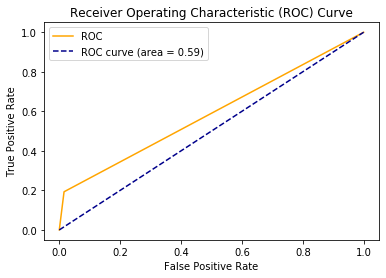

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679


In [205]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_knn)
summary.loc[2] = ['KNN GridSearch', score, Recall, Precision, F1_Score, AUC]
summary

### SVM

In [206]:
model=SVC()
model.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
y_pred = model.predict(test_x)

Accuracy::  0.9002267573696145
Precision::  0.9947916666666666
Recall::  0.9009433962264151
F1 Score::  0.9455445544554455
AUC::  0.6289747807017544


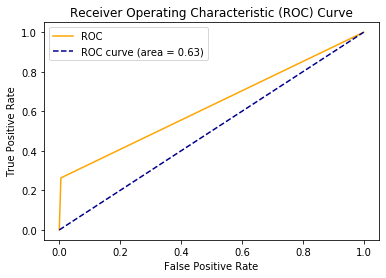

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975


In [208]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred)
summary.loc[3] = ['SVM', score, Recall, Precision, F1_Score, AUC]
summary

In [209]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [210]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [211]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [212]:
grid.best_params_

{'C': 50, 'gamma': 0.01}

In [213]:
model_new=SVC(C=50, gamma=0.01)
model_new.fit(train_x,train_y)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [214]:
accuracy_score(test_y,model_new.predict(test_x))

0.9229024943310657

In [215]:
y_pred = model_new.predict(test_x)

Accuracy::  0.9229024943310657
Precision::  0.9869791666666666
Recall::  0.928921568627451
F1 Score::  0.957070707070707
AUC::  0.7391036184210525


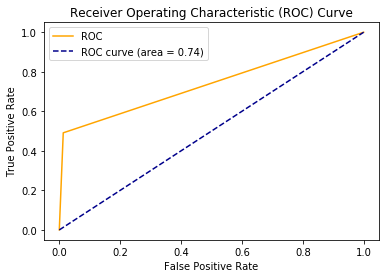

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104


In [216]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred)
summary.loc[4] = ['SVM GridSearch', score, Recall, Precision, F1_Score, AUC]
summary

### Naive Bayes

In [217]:
model = GaussianNB()

In [218]:
model.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [219]:
y_pred = model.predict(test_x)

Accuracy::  0.6961451247165533
Precision::  0.6848958333333334
Recall::  0.9528985507246377
F1 Score::  0.7969696969696969
AUC::  0.7284128289473684


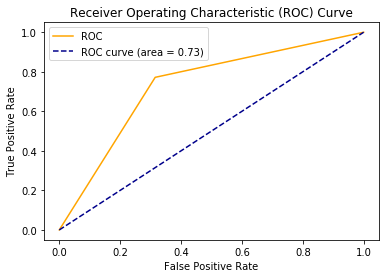

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413


In [220]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred)
summary.loc[5] = ['Naive Bayes', score, Recall, Precision, F1_Score, AUC]
summary

### Decision Tree Classifier

In [221]:
x = hr_attrition_dataset.drop('Attrition', axis=1)
y = hr_attrition_dataset.Attrition

In [222]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=123)

In [223]:
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [224]:
clf.score(train_x, train_y)

1.0

In [225]:
y_pred_dtc = clf.predict(test_x)

In [226]:
clf.score(test_x, test_y)

0.8117913832199547

Accuracy::  0.8117913832199547
Precision::  0.8776041666666666
Recall::  0.903485254691689
F1 Score::  0.8903566710700133
AUC::  0.6230126096491228


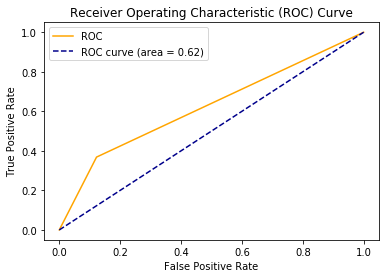

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013


In [227]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_dtc)
summary.loc[6] = ['Decision Tree Classifier', score, Recall, Precision, F1_Score, AUC]
summary

In [228]:
grid_param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'] 
}

In [229]:
grid_search_decision = GridSearchCV(estimator = clf, param_grid = grid_param_dt, cv = 5, n_jobs = -1)

In [230]:
grid_search_decision.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [231]:
grid_search_decision.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [262]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter='random')
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [263]:
clf.score(test_x, test_y)

0.8707482993197279

In [264]:
y_pred_dt = clf.predict(test_x)
accuracy_score(test_y, y_pred_dt)

0.8707482993197279

Accuracy::  0.8707482993197279
Precision::  0.9557291666666666
Recall::  0.9017199017199017
F1 Score::  0.9279393173198482
AUC::  0.6269873903508771


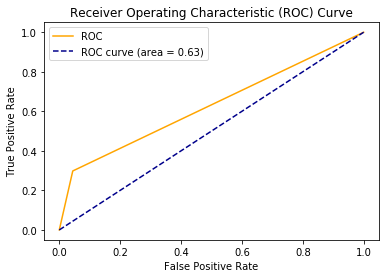

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013
7,Decision Tree Classifier GridSearch,0.870748,0.901720,0.955729,0.927939,0.626987
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431
9,Random Forest Classifier GridSearch,0.897959,0.896956,0.997396,0.944513,0.612733


In [265]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_dt)
summary.loc[7] = ['Decision Tree Classifier GridSearch', score, Recall, Precision, F1_Score, AUC]
summary

### RandomForest Classifier

In [236]:
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [237]:
rand_clf.score(test_x, test_y)
y_pred = rand_clf.predict(test_x)

Accuracy::  0.8956916099773242
Precision::  0.9947916666666666
Recall::  0.8967136150234741
F1 Score::  0.9432098765432098
AUC::  0.6114309210526316


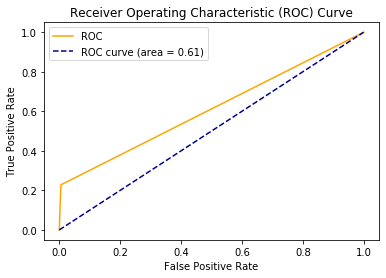

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013
7,Decision Tree Classifier GridSearch,0.870748,0.892086,0.968750,0.928839,0.589638
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431


In [238]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred)
summary.loc[8] = ['Random Forest Classifier', score, Recall, Precision, F1_Score, AUC]
summary

In [239]:
grid_param_rdf = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [240]:
grid_search_rdf = GridSearchCV(estimator=rand_clf, param_grid=grid_param_rdf, cv=5, n_jobs=-1)

In [241]:
grid_search_rdf.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [242]:
grid_search_rdf.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 90}

In [243]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_features = 'log2', min_samples_leaf = 1, min_samples_split= 7, 
                                  n_estimators = 90)
rand_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [244]:
rand_clf.score(test_x, test_y)

0.8979591836734694

In [245]:
y_pred_rdf = rand_clf.predict(test_x)
accuracy_score(test_y, y_pred_rdf)

0.8979591836734694

Accuracy::  0.8979591836734694
Precision::  0.9973958333333334
Recall::  0.8969555035128806
F1 Score::  0.9445129469790382
AUC::  0.612733004385965


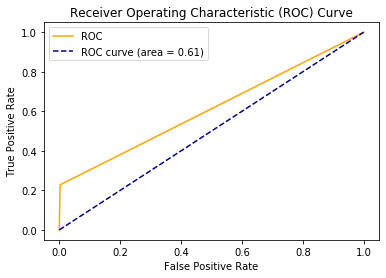

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013
7,Decision Tree Classifier GridSearch,0.870748,0.892086,0.968750,0.928839,0.589638
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431
9,Random Forest Classifier GridSearch,0.897959,0.896956,0.997396,0.944513,0.612733


In [246]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_rdf)
summary.loc[9] = ['Random Forest Classifier GridSearch', score, Recall, Precision, F1_Score, AUC]
summary

### XGBoost Classifier

In [247]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [248]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

1.0

In [249]:
y_pred_test = model.predict(test_x)

In [250]:
accuracy_score(test_y, y_pred_test)

0.9002267573696145

Accuracy::  0.9002267573696145
Precision::  0.9739583333333334
Recall::  0.9166666666666666
F1 Score::  0.9444444444444444
AUC::  0.688733552631579


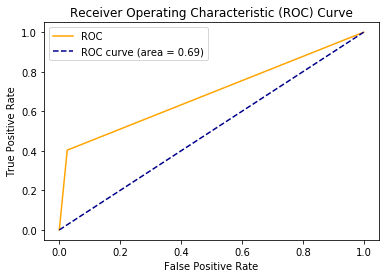

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013
7,Decision Tree Classifier GridSearch,0.870748,0.892086,0.968750,0.928839,0.589638
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431
9,Random Forest Classifier GridSearch,0.897959,0.896956,0.997396,0.944513,0.612733


In [251]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_test)
summary.loc[10] = ['XGBoost Classifier', score, Recall, Precision, F1_Score, AUC]
summary

In [252]:
param_grid={
    'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10, 20],
    'n_estimators': [10, 50, 100, 200]
}

In [253]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'), param_grid)

In [254]:
grid.fit(train_x, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [255]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [256]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [257]:
y_pred_new = new_model.predict(test_x)

Accuracy::  0.891156462585034
Precision::  0.9869791666666666
Recall::  0.8981042654028436
F1 Score::  0.9404466501240694
AUC::  0.616296600877193


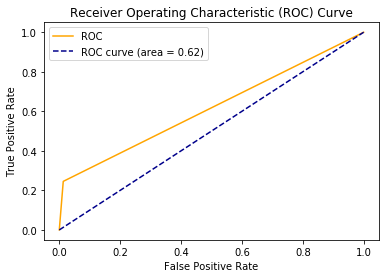

,Algorithm,Score,Recall,Precision,F1_Score,AUC
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
5,Naive Bayes,0.696145,0.952899,0.684896,0.796970,0.728413
6,Decision Tree Classifier,0.811791,0.903485,0.877604,0.890357,0.623013
7,Decision Tree Classifier GridSearch,0.870748,0.892086,0.968750,0.928839,0.589638
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431
9,Random Forest Classifier GridSearch,0.897959,0.896956,0.997396,0.944513,0.612733


In [258]:
score, Recall, Precision, F1_Score, AUC = get_confusion_matrix(test_y, y_pred_new)
summary.loc[11] = ['XGBoost Classifier GridSearch', score, Recall, Precision, F1_Score, AUC]
summary

## Models Comparison

In [259]:
summary.sort_values(by='F1_Score', ascending=False)

,Algorithm,Score,Recall,Precision,F1_Score,AUC
4,SVM GridSearch,0.922902,0.928922,0.986979,0.957071,0.739104
0,Logistic Regression,0.918367,0.928571,0.981771,0.954430,0.736499
3,SVM,0.900227,0.900943,0.994792,0.945545,0.628975
9,Random Forest Classifier GridSearch,0.897959,0.896956,0.997396,0.944513,0.612733
10,XGBoost Classifier,0.900227,0.916667,0.973958,0.944444,0.688734
8,Random Forest Classifier,0.895692,0.896714,0.994792,0.943210,0.611431
11,XGBoost Classifier GridSearch,0.891156,0.898104,0.986979,0.940447,0.616297
1,KNN,0.884354,0.895487,0.981771,0.936646,0.604921
2,KNN GridSearch,0.882086,0.891509,0.984375,0.935644,0.588679
7,Decision Tree Classifier GridSearch,0.870748,0.892086,0.968750,0.928839,0.589638


In [260]:
hr_attrition_dataset.min()

Age                                   2.890372
DailyRate                             4.624973
DistanceFromHome                      0.000000
Education                             1.000000
EnvironmentSatisfaction               1.000000
HourlyRate                            3.401197
JobInvolvement                        1.000000
JobLevel                              1.000000
JobSatisfaction                       1.000000
MonthlyIncome                         6.916715
MonthlyRate                           7.646831
NumCompaniesWorked                    0.000000
PercentSalaryHike                    11.000000
PerformanceRating                     3.000000
RelationshipSatisfaction              1.000000
StockOptionLevel                      0.000000
TotalWorkingYears                     0.000000
TrainingTimesLastYear                 0.000000
WorkLifeBalance                       1.000000
YearsAtCompany                        0.000000
YearsInCurrentRole                    0.000000
YearsSinceLas

In [261]:
hr_attrition_dataset.max()

Age                                   4.094345
DailyRate                             7.312553
DistanceFromHome                      3.367296
Education                             5.000000
EnvironmentSatisfaction               4.000000
HourlyRate                            4.605170
JobInvolvement                        4.000000
JobLevel                              5.000000
JobSatisfaction                       4.000000
MonthlyIncome                         9.903438
MonthlyRate                          10.203555
NumCompaniesWorked                    9.000000
PercentSalaryHike                    25.000000
PerformanceRating                     4.000000
RelationshipSatisfaction              4.000000
StockOptionLevel                      3.000000
TotalWorkingYears                    40.000000
TrainingTimesLastYear                 6.000000
WorkLifeBalance                       4.000000
YearsAtCompany                       40.000000
YearsInCurrentRole                   18.000000
YearsSinceLas